# MyThirdAssignment to see customers Churn Rate

In [745]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report


# Using the new churn data which we saved previously

In [746]:
df = pd.read_csv('New_Churn_data.csv', index_col=None)
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Average_Monthly_Charges_ratio,Monthly_Charges_ratio
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No,29.850000,1.000000
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No,55.573529,0.030140
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes,54.075000,0.497920
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No,40.905556,0.022980
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes,75.825000,0.466205
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No,82.937500,0.042602
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No,102.262500,0.014016
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No,31.495455,0.085438
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes,76.650000,0.242661


In [747]:
print(df.columns)


Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'Average_Monthly_Charges_ratio', 'Monthly_Charges_ratio'],
      dtype='object')


# Using column Transformer and Pipeline machine learning model

In [748]:
categorical_columns = ['PaymentMethod','PhoneService','Contract']

In [749]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),
        ('num', SimpleImputer(strategy='mean'), ['tenure','TotalCharges','MonthlyCharges','Average_Monthly_Charges_ratio','Monthly_Charges_ratio'])  # Replace with actual numeric column name
    ],
    remainder='passthrough')
    

In [750]:
lr_model = Pipeline([('preprocessor', preprocessor),('model', LogisticRegression(random_state=42))])


# Breaking Data into Features & Targets

In [751]:
features = df.drop(['Churn','customerID'], axis= 1)
targets = df['Churn']

# Splitting data into Train & Test Sets

In [752]:
x_train, x_test, y_train, y_test = train_test_split(features,targets, test_size= 0.2, random_state=42)

# Fitting the Data using Machine Learning Model

In [753]:
lr_model.fit(x_train, y_train)

/Users/vincentgunti/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['PaymentMethod',
                                                   'PhoneService',
                                                   'Contract']),
                                                 ('num', SimpleImputer(),
                                                  ['tenure', 'TotalCharges',
                                                   'MonthlyCharges',
                                                   'Average_Monthly_Charges_ratio',
                                                   'Monthly_Charges_ratio'])])),
                ('model', LogisticRegression(random_state=42))])

In [754]:
print(lr_model.score(x_train, y_train))
print(lr_model.score(x_test, y_test))


0.7944621938232161
0.8105039034776437


In [755]:
x_train

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Average_Monthly_Charges_ratio,Monthly_Charges_ratio
2142,21,Yes,One year,Mailed check,64.85,1336.80,63.657143,0.048511
1623,54,Yes,Two year,Bank transfer (automatic),97.20,5129.45,94.989815,0.018949
6074,1,No,Month-to-month,Electronic check,23.45,23.45,23.450000,1.000000
1362,4,Yes,Month-to-month,Electronic check,70.20,237.95,59.487500,0.295020
6754,0,Yes,Two year,Bank transfer (automatic),61.90,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3772,1,Yes,Month-to-month,Electronic check,95.00,95.00,95.000000,1.000000
5191,23,Yes,Two year,Credit card (automatic),91.10,2198.30,95.578261,0.041441
5226,12,Yes,Month-to-month,Electronic check,21.15,306.05,25.504167,0.069106
5390,12,Yes,Month-to-month,Electronic check,99.45,1200.15,100.012500,0.082865


# Plotting Confusion Matrix

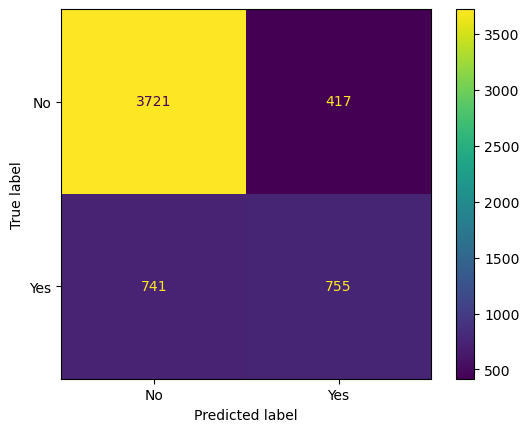

In [756]:
ConfusionMatrixDisplay.from_estimator(lr_model, x_train, y_train)#, colorbar=False) # this argument only works with sklearn 0.24 and up

# Converting categorical values to numerical data as previously the data was as yes or no data values.

In [757]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [758]:
df.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Average_Monthly_Charges_ratio,Monthly_Charges_ratio
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,0,29.850000,1.000000
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,0,55.573529,0.030140
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,1,54.075000,0.497920
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,0,40.905556,0.022980
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,1,75.825000,0.466205


In [759]:
df.shape

(7043, 10)

# Evaluation : "No Information" rate is 73%.

In [760]:
# our "no information" rate is %, or the majority class fraction

df['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [761]:
lr_model.predict_proba(x_test)[:5]

array([[0.26605142, 0.73394858],
       [0.94879044, 0.05120956],
       [0.99574521, 0.00425479],
       [0.20913726, 0.79086274],
       [0.98933262, 0.01066738]])

In [762]:
lr_model.predict(x_train)[:5]

array(['No', 'No', 'Yes', 'Yes', 'No'], dtype=object)

In [763]:
(lr_model.predict_proba(x_train)[:5, 1] > 0.5).astype('int')

array([0, 0, 1, 1, 0])

In [764]:
predictions_lower_thresh = (lr_model.predict_proba(x_train)[:, 1] > 0.61).astype('int')
predictions_lower_thresh[:5]

array([0, 0, 1, 0, 0])

In [765]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5634, 8)
X_test shape: (1409, 8)
y_train shape: (5634,)
y_test shape: (1409,)


In [766]:
print("y_test values:", y_test)
print("predictions_lower_thresh values:", predictions_lower_thresh)


y_test values: 185     Yes
2715     No
3825     No
1807    Yes
132      No
       ... 
6366     No
315      No
2439     No
5002     No
1161    Yes
Name: Churn, Length: 1409, dtype: object
predictions_lower_thresh values: [0 0 1 ... 0 1 0]


In [767]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming 'actual_labels' is the actual target values for x_test
actual_labels = y_test  

# Assuming 'predictions_lower_thresh' are your model predictions
predictions_lower_thresh = lr_model.predict(x_test)

# Evaluating the accuracy
accuracy = accuracy_score(actual_labels, predictions_lower_thresh)
print("Accuracy:", accuracy)

# Evaluating the confusion matrix
conf_matrix = confusion_matrix(actual_labels, predictions_lower_thresh)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8105039034776437
Confusion Matrix:
[[940  96]
 [171 202]]


To sum up, machine learning algorithms enable companies to derive valuable insights from big data sets, streamline decision-making procedures, and improve overall productivity across a range of sectors. In the ever-changing and data-driven corporate world, incorporating machine learning (ML) into business processes can result in increased accuracy, cost savings, and a competitive advantage.


# SUMMARY

Using biographical and New churn data, I was able to effectively model the occurrence of churn using a machine learning model. Very little data cleaning was done: I transformed categorical string columns (the Contract, PhoneService, and Payment method columns) to numeric values and removed the 'customerID' column because we don't require that information. Did discover the goal turnover rate in the telecom sector, where higher monthly fees typically indicate a greater churn rate. We fitted a logistic regression model to the data, and compared with a 73% "No Information" rate on the test data, we achieved 81% accuracy. The model appears promising thus far.



